In [ ]:
###############################################################################################
# Versión 1
# Selección de datos previa a generar modelos.
# Presenta datos por estación
# Elimina estaciones con poca información
# Elimina atributos no relevantes para modelar
# Genera csv de salida
#
# entrada: Valencia_TODASEstaciones_CON_Meteo_1994_2022_v4.csv
#  salida: Valencia_SeleccionDatos_ParaModelar_v1.csv
###############################################################################################

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [ ]:
# Inicializar entorno de rutas en google drive para carga de archivos 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/ParaTono_DatosFinales_Kibana/'
df = pd.read_csv(path + 'Valencia_TODASEstaciones_CON_Meteo_1994_2022_v4.csv', sep=';', index_col='FECHA', parse_dates=['FECHA'])

# Recuperar la fecha como campo
df.insert(0, 'fecha', df.index.strftime('%Y-%m-%d'))

In [ ]:
df

,fecha,COD_ESTACION,NOM_ESTACION,SO2,CO,NO,NO2,NOx,O3,PM10,PM2.5,PM1,Precip.,Temp.,Veloc.,Veloc.max.
FECHA,,,,,,,,,,,,,,,,
2001-07-01,2001-07-01,46250002,CEMENTERIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-02,2001-07-02,46250002,CEMENTERIO,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-03,2001-07-03,46250002,CEMENTERIO,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-04,2001-07-04,46250002,CEMENTERIO,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-07-05,2001-07-05,46250002,CEMENTERIO,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-10-27,2008-10-27,46250046,POLITÈCNIC,5.0,NaN,29.0,74.0,118.0,32.0,39.3,21.8,15.9,NaN,NaN,NaN,NaN
2008-10-28,2008-10-28,46250046,POLITÈCNIC,4.0,NaN,30.0,56.0,102.0,28.0,29.4,19.6,15.0,NaN,NaN,NaN,NaN
2008-10-29,2008-10-29,46250046,POLITÈCNIC,3.0,NaN,15.0,44.0,66.0,49.0,13.4,4.3,2.5,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()/len(df)*100

fecha            0.000000
COD_ESTACION     0.000000
NOM_ESTACION     0.000000
SO2             11.027420
CO              53.914476
NO              41.851995
NO2             41.933371
NOx             41.825201
O3              41.773597
PM10            69.491996
PM2.5           76.194588
PM1             86.261375
Precip.         74.054006
Temp.           65.797334
Veloc.          63.777824
Veloc.max.      74.177062
dtype: float64

In [ ]:
# Comprobar rango de fechas disponible para cada estación y registros disponibles
# df['FECHA'] = pd.to_datetime(df['FECHA'], format="%d/%m/%Y")
print(f'Nº de registros totales y rango de fechas por estación:')
print(f'{"CODIGO":=^10} {"NOM_ESTACION":=^30} {"Desde":=^10} {"Hasta":=^10} {"Nº reg":=^8}')
for esta in df['NOM_ESTACION'].unique():
  print(f'{str(df[df["NOM_ESTACION"]==esta]["COD_ESTACION"].unique())[0:10]} {esta:30} {str(df[df["NOM_ESTACION"]==esta]["fecha"].min())[0:10]} {str(df[df["NOM_ESTACION"]==esta]["fecha"].max())[0:10]} {df[df["NOM_ESTACION"]==esta]["NOM_ESTACION"].count():8}')

Nº de registros totales y rango de fechas por estación:
==CODIGO== =========NOM_ESTACION========= ==Desde=== ==Hasta=== =Nº reg=
[46250002] CEMENTERIO                     1997-01-01 2004-12-31     2922
[46250005] LABORATORI                     1994-01-01 2004-12-31     3984
[46250015] VIVERS-M                       1994-01-01 2004-12-31     3984
[46250018] POLIGONO                       1994-01-01 2004-12-31     3984
[46250025] ARAGÓ-M                        1994-01-01 2004-12-31     3984
[46250026] C/SAGUNT                       1994-01-01 2004-12-31     3984
[46250028] AVD. PORT                      1994-01-01 2004-12-31     3984
[46250030] PISTA DE SILLA                 1994-01-01 2022-03-31     9919
[46250031] NUEVO CENTRO                   1994-01-01 2009-12-31     5810
[46250032] GRAN VIA                       1994-01-01 2002-12-31     3253
[46250033] ARAGÓN                         1994-01-01 2007-12-31     5079
[46250034] LINARES                        1994-01-01 2010-12-31     

In [ ]:
print(f'Nº de registros totales y nº de atributos nulos por estación:')
print(f'{"NOM_ESTACION":=^18} {"Nº reg":=^6} {"SO2":=^6} {"CO":=^6} {"NO":=^6} {"NO2":=^6} {"NOx":=^6} {"O3":=^6} {"PM10":=^6}\
 {"PM2.5":=^6} {"PM1":=^6} {"Preci":=^6} {"Temp":=^6} {"Veloc":=^6} {"Vemax":=^6} {"TOTAL":=^6}')
for esta in df['NOM_ESTACION'].unique():
  print(f'{esta:18} {df[df["NOM_ESTACION"]==esta]["NOM_ESTACION"].count():6}\
 {df[df["NOM_ESTACION"]==esta]["SO2"].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["CO"].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["NO"].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["NO2"].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["NOx"].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["O3"].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["PM10"].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["PM2.5"].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["PM1"].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["Precip."].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["Temp."].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["Veloc."].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta]["Veloc.max."].isnull().sum():6}\
 {df[df["NOM_ESTACION"]==esta].isnull().sum().sum():6}')

print(f'{"TOTAL ESTACIONES:":>18} {df["NOM_ESTACION"].count():6}\
 {df["SO2"].isnull().sum():6}\
 {df["CO"].isnull().sum():6}\
 {df["NO"].isnull().sum():6}\
 {df["NO2"].isnull().sum():6}\
 {df["NOx"].isnull().sum():6}\
 {df["O3"].isnull().sum():6}\
 {df["PM10"].isnull().sum():6}\
 {df["PM2.5"].isnull().sum():6}\
 {df["PM1"].isnull().sum():6}\
 {df["Precip."].isnull().sum():6}\
 {df["Temp."].isnull().sum():6}\
 {df["Veloc."].isnull().sum():6}\
 {df["Veloc.max."].isnull().sum():6}\
 {df.isnull().sum().sum():6}')

Nº de registros totales y nº de atributos nulos por estación:
===NOM_ESTACION=== Nº reg =SO2== ==CO== ==NO== =NO2== =NOx== ==O3== =PM10= PM2.5= =PM1== Preci= =Temp= Veloc= Vemax= TOTAL=
CEMENTERIO           2922    370   2837   2717   2717   2717   2768   2771   2838   2910   2734   2736   2736   2782  33633
LABORATORI           3984    407   3934   3893   3893   3893   3919   3939   3942   3980   3924   3927   3924   3936  47511
VIVERS-M             3984    481   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984  48289
POLIGONO             3984    386   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984  48194
ARAGÓ-M              3984    394   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984  48202
C/SAGUNT             3984    259   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984   3984  48067
AVD. PORT            3984    342   3503   3510   3510   3510   3516   

In [ ]:
print(f'Nº de registros totales y PORCENTAJE DE atributos nulos por estación:')
print(f'{"NOM_ESTACION":=^18} {"Nº reg":=^6} {"SO2":=^6} {"CO":=^6} {"NO":=^6} {"NO2":=^6} {"NOx":=^6} {"O3":=^6} {"PM10":=^6}\
 {"PM2.5":=^6} {"PM1":=^6} {"Preci":=^6} {"Temp":=^6} {"Veloc":=^6} {"Vemax":=^6} {"TOTAL":=^6}')
for esta in df['NOM_ESTACION'].unique():
 print(f'{esta:18} {df[df["NOM_ESTACION"]==esta]["NOM_ESTACION"].count():6}\
 {df[df["NOM_ESTACION"]==esta]["SO2"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["CO"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["NO"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["NO2"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["NOx"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["O3"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["PM10"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["PM2.5"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["PM1"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["Precip."].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["Temp."].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["Veloc."].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["Veloc.max."].isnull().mean()*100:6.2f}\
 {(df[df["NOM_ESTACION"]==esta].isnull().sum().sum()/(df[df["NOM_ESTACION"]==esta]["NOM_ESTACION"].count()*13)*100):6.2f}')

print(f'{"TOTAL ESTACIONES:":>18} {df["NOM_ESTACION"].count():6}\
 {df["SO2"].isnull().mean()*100:6.2f}\
 {df["CO"].isnull().mean()*100:6.2f}\
 {df["NO"].isnull().mean()*100:6.2f}\
 {df["NO2"].isnull().mean()*100:6.2f}\
 {df["NOx"].isnull().mean()*100:6.2f}\
 {df["O3"].isnull().mean()*100:6.2f}\
 {df["PM10"].isnull().mean()*100:6.2f}\
 {df["PM2.5"].isnull().mean()*100:6.2f}\
 {df["PM1"].isnull().mean()*100:6.2f}\
 {df["Precip."].isnull().mean()*100:6.2f}\
 {df["Temp."].isnull().mean()*100:6.2f}\
 {df["Veloc."].isnull().mean()*100:6.2f}\
 {df["Veloc.max."].isnull().mean()*100:6.2f}\
 {df.isna().sum().sum()/(len(df)*13)*100:6.2f}')

Nº de registros totales y PORCENTAJE DE atributos nulos por estación:
===NOM_ESTACION=== Nº reg =SO2== ==CO== ==NO== =NO2== =NOx== ==O3== =PM10= PM2.5= =PM1== Preci= =Temp= Veloc= Vemax= TOTAL=
CEMENTERIO           2922  12.66  97.09  92.98  92.98  92.98  94.73  94.83  97.13  99.59  93.57  93.63  93.63  95.21  88.54
LABORATORI           3984  10.22  98.74  97.72  97.72  97.72  98.37  98.87  98.95  99.90  98.49  98.57  98.49  98.80  91.73
VIVERS-M             3984  12.07 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00  93.24
POLIGONO             3984   9.69 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00  93.05
ARAGÓ-M              3984   9.89 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00  93.07
C/SAGUNT             3984   6.50 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00  92.81
AVD. PORT            3984   8.58  87.93  88.10  88.10  88.10  

El valor que menos datos faltantes tiene es el SO2, pero no lo vamos a considerar pues hay 4 estaciones que solo tienen ese indicador y el resto de atributos con el 100% de datos faltantes.

Nos vamos a basar en el porcentaje total de datos faltantes para ver que estaciones tienen globalmente mayor cantidad de indicadores informados.

Las 4 estaciones con mejor ratio total de datos faltantes son: 
* 14.43% MOLÍ DEL SOL  
* 15.14% AVD. FRANCIA    
* 21.89% POLITÈCNIC
* 29.17% PISTA DE SILLA  

In [ ]:
# Mantener solo las estaciones seleccionadas

df = df[df.NOM_ESTACION.isin(['MOLÍ DEL SOL', 'AVD. FRANCIA', 'POLITÈCNIC', 'PISTA DE SILLA'])]

In [ ]:
print(f'Nº de registros totales y PORCENTAJE DE atributos nulos por estación:')
print(f'{"NOM_ESTACION":=^18} {"Nº reg":=^6} {"SO2":=^6} {"CO":=^6} {"NO":=^6} {"NO2":=^6} {"NOx":=^6} {"O3":=^6} {"PM10":=^6}\
 {"PM2.5":=^6} {"PM1":=^6} {"Preci":=^6} {"Temp":=^6} {"Veloc":=^6} {"Vemax":=^6} {"TOTAL":=^6}')
for esta in df['NOM_ESTACION'].unique():
 print(f'{esta:18} {df[df["NOM_ESTACION"]==esta]["NOM_ESTACION"].count():6}\
 {df[df["NOM_ESTACION"]==esta]["SO2"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["CO"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["NO"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["NO2"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["NOx"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["O3"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["PM10"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["PM2.5"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["PM1"].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["Precip."].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["Temp."].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["Veloc."].isnull().mean()*100:6.2f}\
 {df[df["NOM_ESTACION"]==esta]["Veloc.max."].isnull().mean()*100:6.2f}\
 {(df[df["NOM_ESTACION"]==esta].isnull().sum().sum()/(df[df["NOM_ESTACION"]==esta]["NOM_ESTACION"].count()*13)*100):6.2f}')

print(f'{"TOTAL ESTACIONES:":>18} {df["NOM_ESTACION"].count():6}\
 {df["SO2"].isnull().mean()*100:6.2f}\
 {df["CO"].isnull().mean()*100:6.2f}\
 {df["NO"].isnull().mean()*100:6.2f}\
 {df["NO2"].isnull().mean()*100:6.2f}\
 {df["NOx"].isnull().mean()*100:6.2f}\
 {df["O3"].isnull().mean()*100:6.2f}\
 {df["PM10"].isnull().mean()*100:6.2f}\
 {df["PM2.5"].isnull().mean()*100:6.2f}\
 {df["PM1"].isnull().mean()*100:6.2f}\
 {df["Precip."].isnull().mean()*100:6.2f}\
 {df["Temp."].isnull().mean()*100:6.2f}\
 {df["Veloc."].isnull().mean()*100:6.2f}\
 {df["Veloc.max."].isnull().mean()*100:6.2f}\
 {df.isna().sum().sum()/(len(df)*13)*100:6.2f}')

Nº de registros totales y PORCENTAJE DE atributos nulos por estación:
===NOM_ESTACION=== Nº reg =SO2== ==CO== ==NO== =NO2== =NOx== ==O3== =PM10= PM2.5= =PM1== Preci= =Temp= Veloc= Vemax= TOTAL=
PISTA DE SILLA       9919   4.00   4.48   3.40   3.40   3.40   4.74  58.12  71.94  85.44  69.74   2.02   2.02  66.56  29.17
POLITÈCNIC           5205   3.88  83.86   3.55   3.55   3.55   2.19   2.29   2.63  33.39  37.79  37.56  33.49  36.79  21.89
AVD. FRANCIA         4839   1.74   2.52   1.84   1.84   1.84   0.06  23.52  23.52  47.37  33.33  33.33   0.02  25.87  15.14
MOLÍ DEL SOL         4839   3.64  10.35   5.56   5.56   5.56   3.64  10.60  10.85  10.27  32.01  31.43  27.13  31.02  14.43
 TOTAL ESTACIONES:  24802   3.46  21.90   3.55   3.55   3.55   3.08  30.38  36.03  52.42  48.57  21.32  13.13  45.44  22.03


De las cuatro estaciones seleccionadas descartaremos las características CO y PM1 pues en algun caso supera el 80% de valores nulos.

In [ ]:
df.drop(['CO'], axis='columns', inplace=True)
df.drop(['PM1'], axis='columns', inplace=True)

In [ ]:
df

,fecha,COD_ESTACION,NOM_ESTACION,SO2,NO,NO2,NOx,O3,PM10,PM2.5,Precip.,Temp.,Veloc.,Veloc.max.
FECHA,,,,,,,,,,,,,,
2001-07-01,2001-07-01,46250030,PISTA DE SILLA,3.0,12.0,40.0,59.0,50.0,NaN,NaN,NaN,27.5,0.5,NaN
2001-07-02,2001-07-02,46250030,PISTA DE SILLA,4.0,25.0,55.0,93.0,54.0,NaN,NaN,NaN,28.3,0.9,NaN
2001-07-03,2001-07-03,46250030,PISTA DE SILLA,3.0,13.0,32.0,52.0,52.0,NaN,NaN,NaN,27.5,0.8,NaN
2001-07-04,2001-07-04,46250030,PISTA DE SILLA,3.0,4.0,14.0,21.0,45.0,NaN,NaN,NaN,26.8,0.9,NaN
2001-07-05,2001-07-05,46250030,PISTA DE SILLA,4.0,8.0,31.0,44.0,45.0,NaN,NaN,NaN,28.0,1.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-10-27,2008-10-27,46250046,POLITÈCNIC,5.0,29.0,74.0,118.0,32.0,39.3,21.8,NaN,NaN,NaN,NaN
2008-10-28,2008-10-28,46250046,POLITÈCNIC,4.0,30.0,56.0,102.0,28.0,29.4,19.6,NaN,NaN,NaN,NaN
2008-10-29,2008-10-29,46250046,POLITÈCNIC,3.0,15.0,44.0,66.0,49.0,13.4,4.3,NaN,NaN,NaN,NaN


In [ ]:
# Interpolar valores faltantes en base a índice de fechas, siempre que el hueco no sea de más de 4 valores NaN
# NO SE HACE LA INTERPOLACION PORQUE YA SE HA HECHO ANTES DE CREAR EL FICHERO CSV DE ENTRADA
# df = df.interpolate(method='time', limit=3, limit_direction='both', limit_area='inside')

In [ ]:
print(f'Nº de registros totales y rango de fechas por estación:')
print(f'{"CODIGO":=^10} {"NOM_ESTACION":=^18} {"Desde":=^10} {"Hasta":=^10} {"Nº reg":=^8}')
for esta in df['NOM_ESTACION'].unique():
  print(f'{str(df[df["NOM_ESTACION"]==esta]["COD_ESTACION"].unique())[0:10]} {esta:18} {str(df[df["NOM_ESTACION"]==esta]["fecha"].min())[0:10]}\
 {str(df[df["NOM_ESTACION"]==esta]["fecha"].max())[0:10]} {df[df["NOM_ESTACION"]==esta]["NOM_ESTACION"].count():8}')

Nº de registros totales y rango de fechas por estación:
==CODIGO== ===NOM_ESTACION=== ==Desde=== ==Hasta=== =Nº reg=
[46250030] PISTA DE SILLA     1994-01-01 2022-03-31     9919
[46250046] POLITÈCNIC         2008-01-01 2022-03-31     5205
[46250047] AVD. FRANCIA       2009-01-01 2022-03-31     4839
[46250048] MOLÍ DEL SOL       2009-01-01 2022-03-31     4839


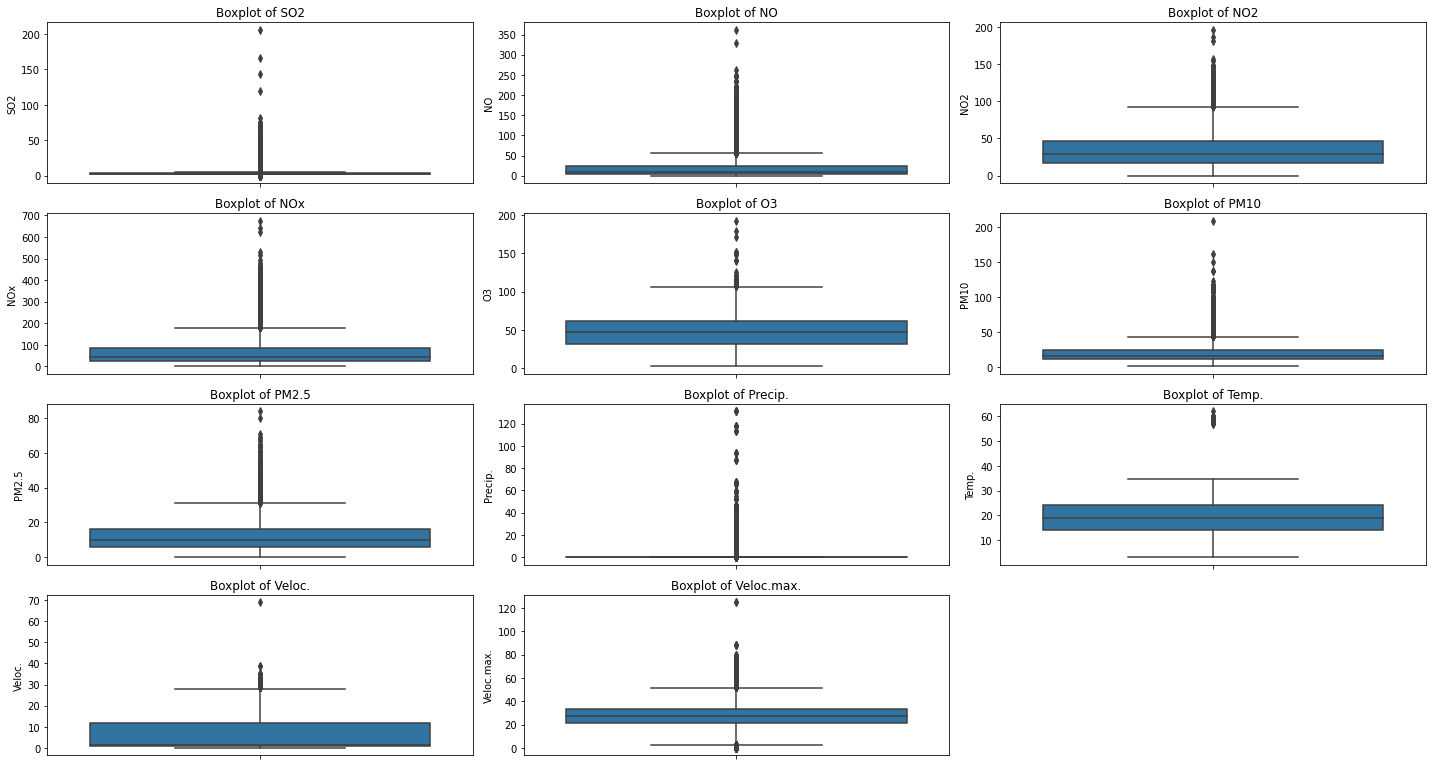

In [ ]:
# outliers

Features = ['SO2', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'Precip.', 'Temp.', 'Veloc.', 'Veloc.max.']
plt.figure(figsize = (20,16))
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y=df[Features[i]])
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [ ]:
df.drop(['COD_ESTACION'], axis='columns').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SO2,23943.0,4.408964,4.839433,0.0,3.00,3.00,4.00,206.0
NO,23922.0,19.837402,26.203753,0.0,4.00,10.00,25.00,362.0
NO2,23922.0,34.350131,22.502214,0.0,17.00,29.00,47.00,196.0
NOx,23922.0,64.487250,59.877527,0.0,23.00,45.00,86.00,676.0
O3,24039.0,46.315404,20.107269,2.0,31.00,47.00,61.00,193.0
PM10,17267.0,18.709218,12.049976,1.0,11.00,16.00,24.00,209.0
PM2.5,15866.0,12.061074,8.134667,0.0,6.00,10.00,16.00,84.0
Precip.,12755.0,1.155257,6.118990,0.0,0.00,0.00,0.00,131.0
Temp.,19513.0,19.187529,5.883652,3.1,14.15,19.05,24.25,62.0
Veloc.,21545.0,5.992113,6.847787,0.0,0.80,1.60,12.00,69.0


In [ ]:
# Hay valores muy extremos en SO2, NO2, O3, y PM10 que se van a recortar para que no afecten al entrenamiento
df['SO2'] = np.where(df['SO2'] > 150.0, 150.0, df['SO2'])
df['NO2'] = np.where(df['NO2'] > 150.0, 150.0, df['NO2'])
df['O3'] = np.where(df['O3'] > 150.0, 150.0, df['O3'])
df['PM10'] = np.where(df['PM10'] > 150.0, 150.0, df['PM10'])

In [ ]:
df.drop(['COD_ESTACION'], axis='columns').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SO2,23943.0,4.405957,4.733156,0.0,3.00,3.00,4.00,150.0
NO,23922.0,19.837402,26.203753,0.0,4.00,10.00,25.00,362.0
NO2,23922.0,34.344927,22.471291,0.0,17.00,29.00,47.00,150.0
NOx,23922.0,64.487250,59.877527,0.0,23.00,45.00,86.00,676.0
O3,24039.0,46.311327,20.082939,2.0,31.00,47.00,61.00,150.0
PM10,17267.0,18.705164,11.997030,1.0,11.00,16.00,24.00,150.0
PM2.5,15866.0,12.061074,8.134667,0.0,6.00,10.00,16.00,84.0
Precip.,12755.0,1.155257,6.118990,0.0,0.00,0.00,0.00,131.0
Temp.,19513.0,19.187529,5.883652,3.1,14.15,19.05,24.25,62.0
Veloc.,21545.0,5.992113,6.847787,0.0,0.80,1.60,12.00,69.0


In [ ]:
# Clasificar datos por COD_ESTACION y fecha
dfOrdenado = df.sort_values(['COD_ESTACION', 'fecha'])


# Escribir csv depués de seleccionar datos
path = '/content/drive/MyDrive/datoscsv/'
dfOrdenado.to_csv(path + 'Valencia_SeleccionDatos_ParaModelar_v1.csv', header=True, sep=';', index=False)